In [416]:
#import libraries

import scipy.io
import pandas as pd
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height:1400em; }</style>"))


%matplotlib inline

In [417]:
#initialization

df = pd.DataFrame(scipy.io.loadmat('/home/aditya/Downloads/kmeans.mat')['AllSamples'])
df.columns = ['x','y']    
t = {1: 'r', 2: 'b', 3: 'g', 4: 'c',5: 'm', 6: 'y', 7:'k', 8: 'peru', 9: 'slategrey', 10: 'gold'}
centroids= {}
max_x = max(df['x'])
min_x = min(df['x'])
max_y = max(df['y'])
min_y = min(df['y'])

In [418]:
#finding euclidean distance

def euc(x1,x2,y1,y2):
    return np.sqrt( (x1-x2)**2 + (y1-y2)**2)

In [419]:
#plotting scatter plot

def plot():
    fig = plt.figure(figsize=(6,6))
    plt.scatter(df['x'],df['y'], color= df['color'], alpha = 0.4, edgecolor='k')
    
    for i in centroids.keys():
        plt.scatter(*centroids[i], color = t[i], marker= "*", s=150)

    plt.show()

In [420]:
#finding centroids using strategy 2

def strategy_2_centroids(centroids, nc,df) :
    # return random point when i=1
    if nc == 1:
        return [random.uniform(min_x,max_x), random.uniform(min_y,max_y)]
    maxd = -99999999
    pc = []
    #exlude point if already in centroids{}
    for ind in df.index:
        if [df['x'][ind],df['y'][ind]] in centroids.values():
            continue
        s=0
        for i in centroids.keys():
            s=s+(df['x'][ind]-centroids[i][0])**2 + (df['y'][ind]-centroids[i][1])**2 
        if s/nc > maxd:
            maxd=s/nc
            pc = [df['x'][ind],df['y'][ind]]
    return pc

In [421]:
#finding centroids using strategy 1

def strategy_1_centroids(nc):
    return {
    i+1 : [random.uniform(min_x,max_x), random.uniform(min_y,max_y)]
    for i in range(nc)
  }

In [422]:
#strategy 1

def strategy_1(centroids,df,nc):
    df = assignment(df,centroids)
    iterate_till_terminate(centroids,df,nc)

In [423]:
#strategy 2

def strategy_2(centroids,df,nc):
    df = assignment(df,centroids)
    iterate_till_terminate(centroids,df,nc)

In [424]:
#WCSS function

def cost_fun(nc,df,centroids):
    wcss=0
    for x in range(1,nc+1):
        wcss+= np.sum((df[df['closest'] == x]['x'] - centroids[x][0])**2 + 
                      (df[df['closest'] == x]['y'] - centroids[x][1])**2)
    return wcss

In [425]:
#assginment stage

def assignment (df, centroids):
    for i in centroids:
        df['dist_{}'.format(i)] = (
        euc(df['x'], centroids[i][0], df['y'], centroids[i][1])
        )
        
    centroid_dist_cols = ['dist_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,centroid_dist_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('dist_')))
    df['color'] = df['closest'].map(lambda x: t[x])
    return df

In [426]:
#updating centroids

def update(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

In [427]:
#iteration state

def iterate_till_terminate(centroids,df,nc):
    cnt=0
    while(True):

        old_centroids = copy.deepcopy(centroids)
        centroids = update(centroids)
        prev_centers = copy.deepcopy(df['closest'])
        df = assignment(df, centroids)
        if df['closest'].equals(prev_centers):
#             print(nc, cnt)
#             print("yes!!!!")
            return cnt
        else :
            cnt=cnt+1

In [428]:
#plotting objective function

def plot_obj_fun(of):
    list_of_tuples = list(zip(k,of))   
    
    ofdf = pd.DataFrame(list_of_tuples, columns = ['K', 'WCSS'])
    display(HTML(ofdf.to_html()))
    
    
    
    
    plt.plot(k,of1,linewidth=2.0)
    plt.show()

%%%%%%%%%%%%%%% Strategy 1 %%%%%%%%%%%%%%%
>>>>>>>>>>>> Initialization  1  <<<<<<<<<<<<<<<
K =  1


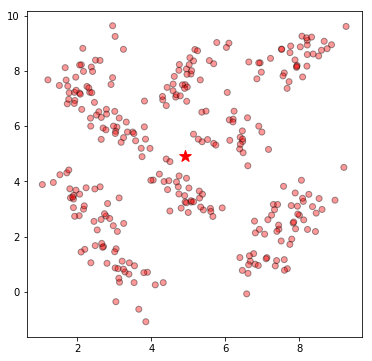

K =  2


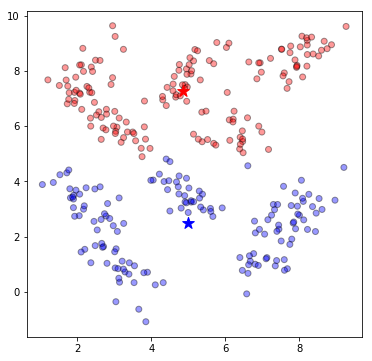

K =  3


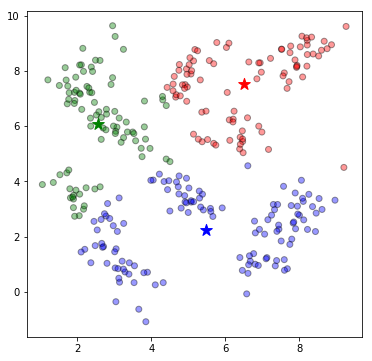

K =  4


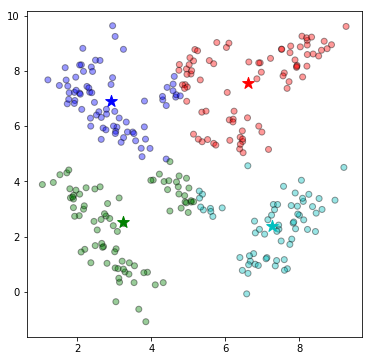

K =  5


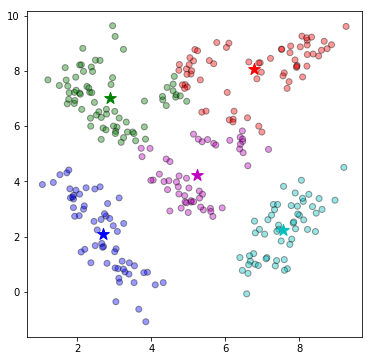

K =  6


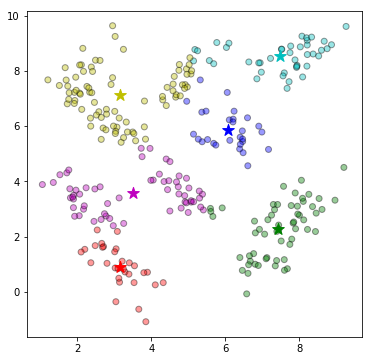

K =  7


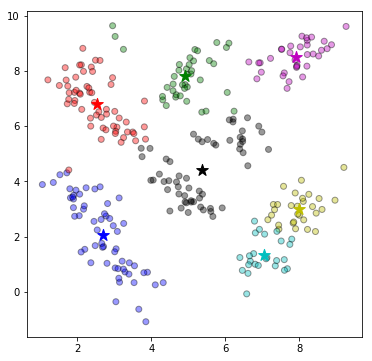

K =  8


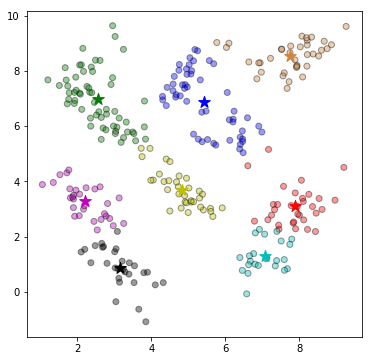

K =  9


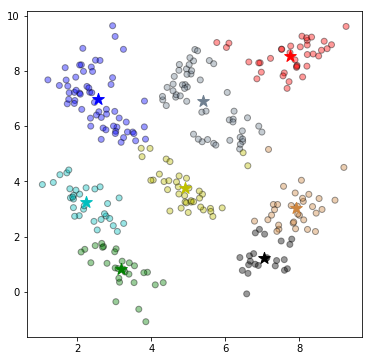

K =  10


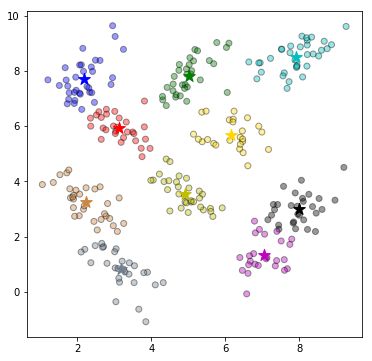

,K,WCSS
0,1,3639.540769
1,2,1921.033486
2,3,1293.777452
3,4,789.237972
4,5,598.554644
5,6,511.137589
6,7,419.621051
7,8,317.317670
8,9,317.161504
9,10,182.859296


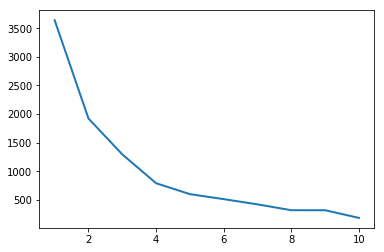

>>>>>>>>>>>> Initialization  2  <<<<<<<<<<<<<<<
K =  1


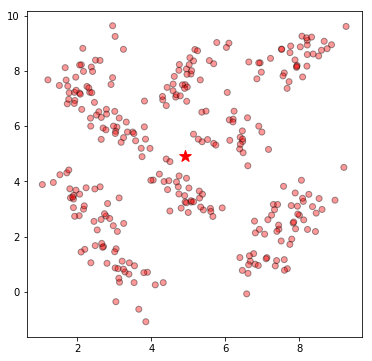

K =  2


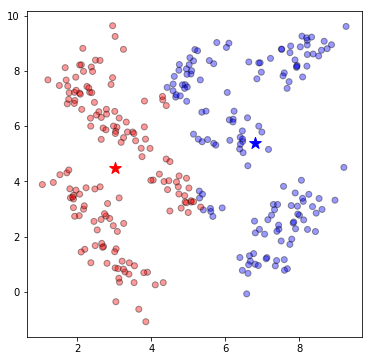

K =  3


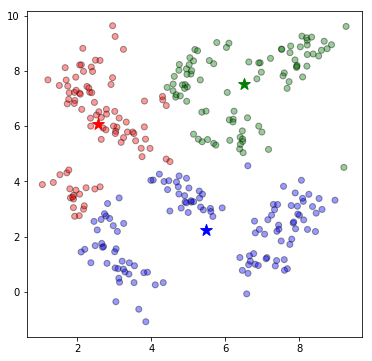

K =  4


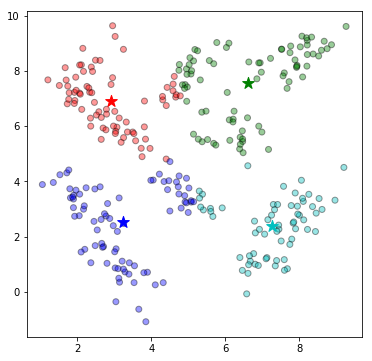

K =  5


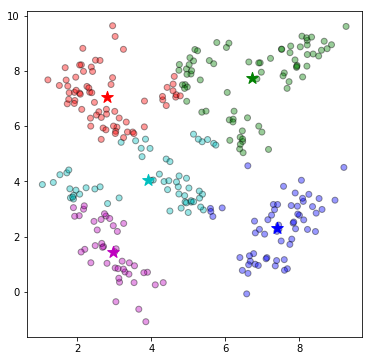

K =  6


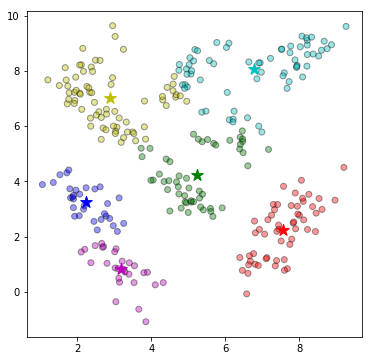

K =  7


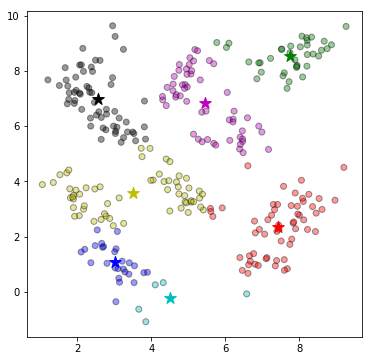

K =  8


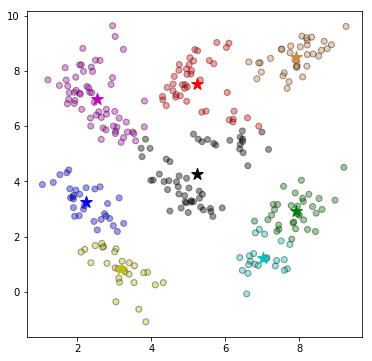

K =  9


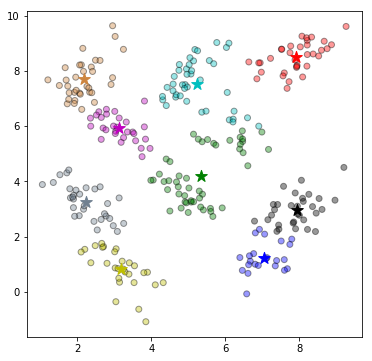

K =  10


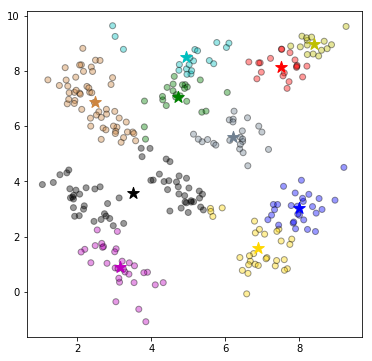

,K,WCSS
0,1,3639.540769
1,2,2498.113560
2,3,1293.777452
3,4,789.237972
4,5,649.872143
5,6,498.561403
6,7,465.156809
7,8,313.380702
8,9,255.841039
9,10,318.947040


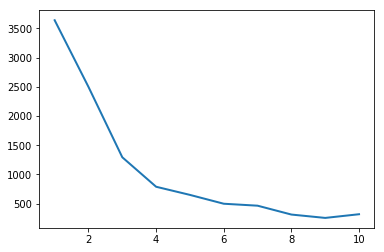

%%%% Strategy 2 %%%%
>>>>>>>>>>>> Initialization  1  <<<<<<<<<<<<<<<


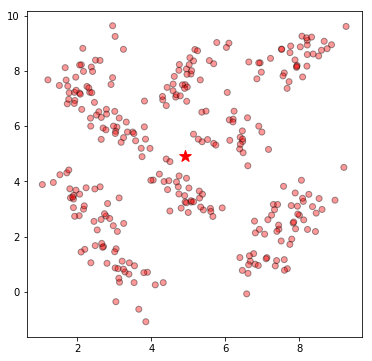

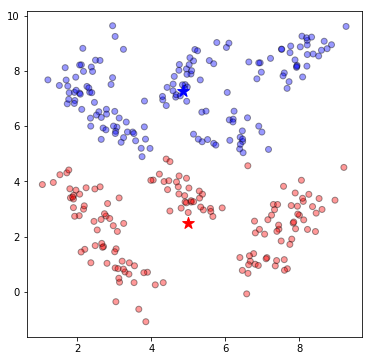

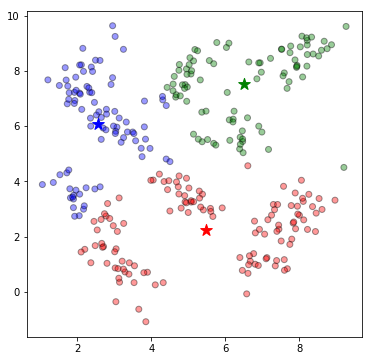

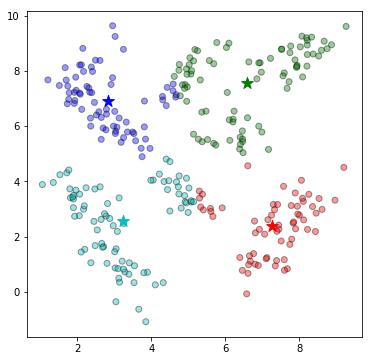

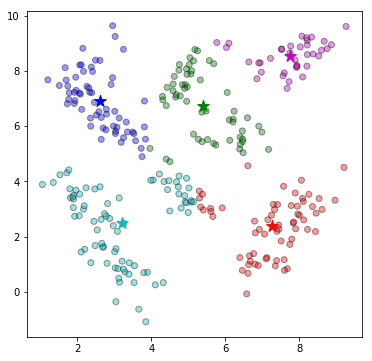

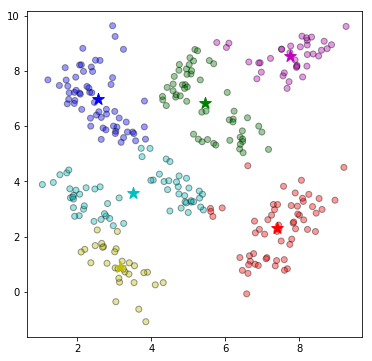

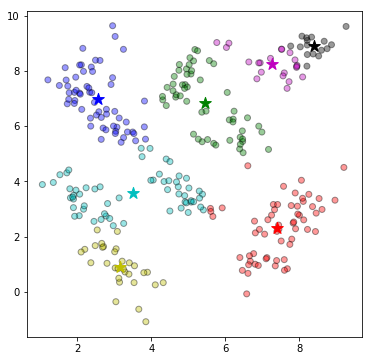

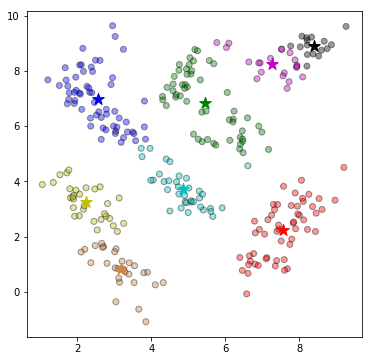

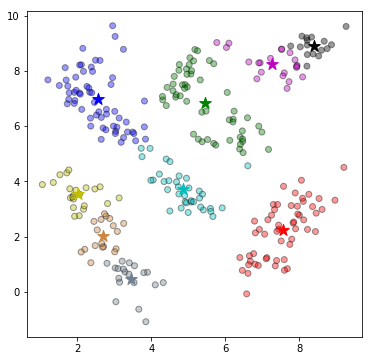

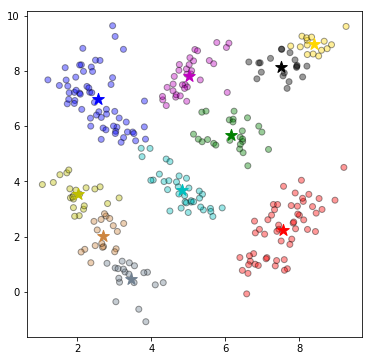

,K,WCSS
0,1,3639.540769
1,2,1921.033486
2,3,1293.777452
3,4,788.964581
4,5,613.282439
5,6,476.118752
6,7,460.657087
7,8,352.204182
8,9,334.852946
9,10,261.387080


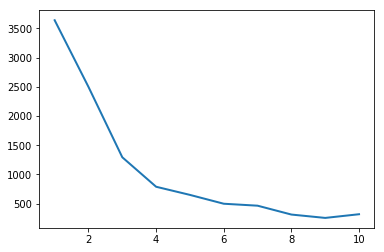

>>>>>>>>>>>> Initialization  2  <<<<<<<<<<<<<<<


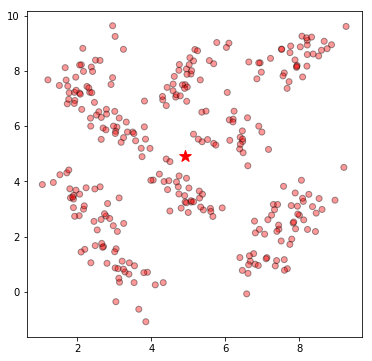

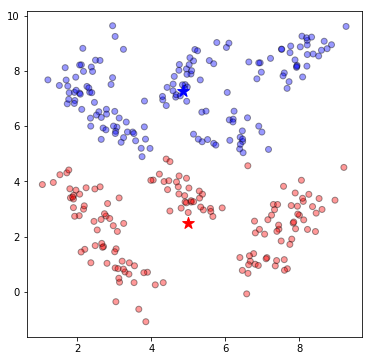

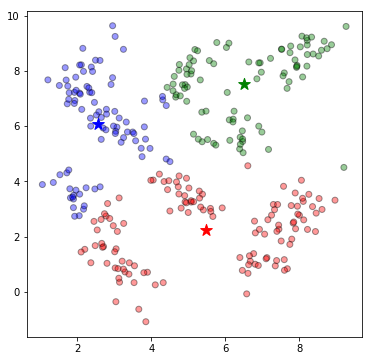

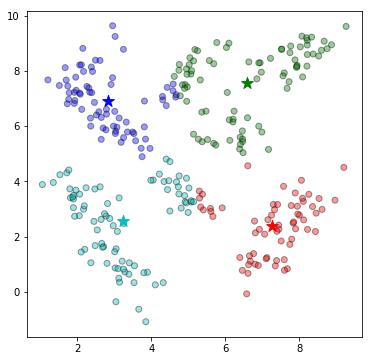

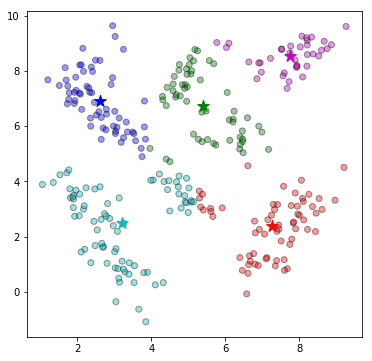

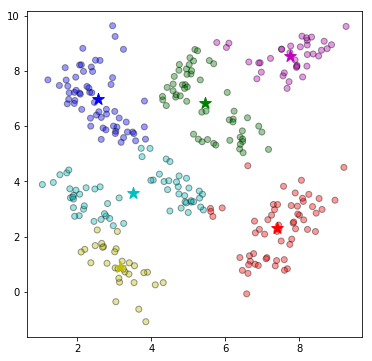

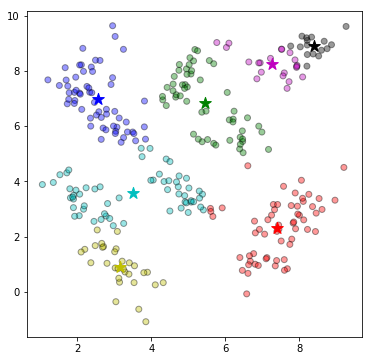

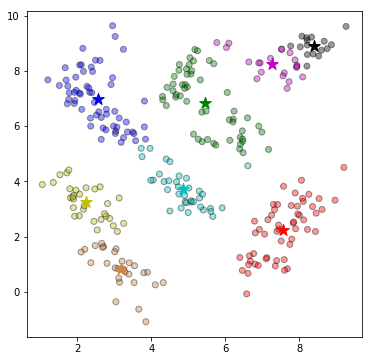

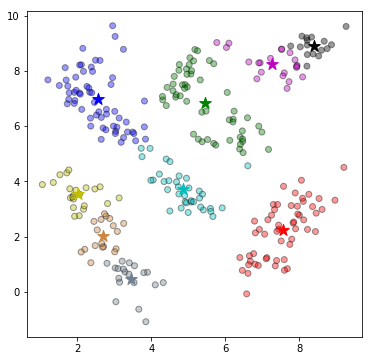

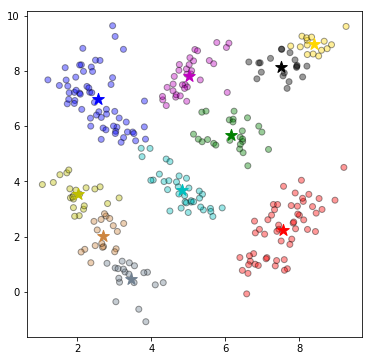

,K,WCSS
0,1,3639.540769
1,2,1921.033486
2,3,1293.777452
3,4,788.964581
4,5,613.282439
5,6,476.118752
6,7,460.657087
7,8,352.204182
8,9,334.852946
9,10,261.387080


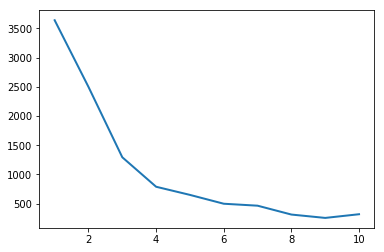

In [429]:
k = [x for x in range(1,11)]

r = 1
print("%%%%%%%%%%%%%%% Strategy 1 %%%%%%%%%%%%%%%")
while r <3:
    print(">>>>>>>>>>>> Initialization ", r, " <<<<<<<<<<<<<<<" )
    of1=[]
    centroids = {}

    for nc in k:
        print("K = ", nc)
        centroids = strategy_1_centroids(nc)
#         print("Initial Centroids : ", centroids)
        strategy_1(centroids,df,nc)
#         print("Converged Centroids :", centroids)
#         print("\nPlot for k = ", nc)
        plot()
        of1.append(cost_fun(nc,df,centroids))
    
    plot_obj_fun(of1)
    r+=1

print("%%%% Strategy 2 %%%%")
r=1
while r < 3:
    print(">>>>>>>>>>>> Initialization ", r, " <<<<<<<<<<<<<<<" )
    of2 = []
    centroids = {}

    for nc in k:
        np.random.seed(100 + r*200)
        centroids[nc] = strategy_2_centroids(centroids,nc,df)
#         print("K = ", nc)
#         print("Initial Centroids : ", centroids)
        strategy_2(centroids,df,nc)
#         print("Converged Centroids : ", centroids)
#         print("\nPlot for k = ", nc)
        plot()
        of2.append(cost_fun(nc,df,centroids))
    plot_obj_fun(of2)
    r+=1